In [1]:
from pybela import Streamer
streamer = Streamer()

Running in Jupyter notebook. Enabling nest_asyncio.


# rec data

In [2]:
streamer.connect()

Connection successful


1

In [3]:
# done
# streamer.start_streaming(saving_enabled=True, saving_filename="cape.txt")
# streamer.wait(15)
# streamer.stop_streaming()

In [4]:
streamer.start_streaming(saving_enabled=True, saving_filename="pepper.txt")
streamer.wait(15)
streamer.stop_streaming()

Started streaming variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']... Run stop_streaming() to stop streaming.
Stopped streaming variables ['gFaabSensor_1', 'gFaabSensor_2', 'gFaabSensor_3', 'gFaabSensor_4', 'gFaabSensor_5', 'gFaabSensor_6', 'gFaabSensor_7', 'gFaabSensor_8']...


# load data

In [5]:
from pybela import Streamer

streamer = Streamer()

num_sensors = 8

cape_raw_data = [0 for i in range(num_sensors)]
pepper_raw_data = [0 for i in range(num_sensors)]
for i in range (num_sensors):
    cape_raw_data[i] = streamer.load_data_from_file('gFaabSensor_{}_cape.txt'.format(i+1))
    pepper_raw_data[i]= streamer.load_data_from_file('gFaabSensor_{}_pepper.txt'.format(i+1))



Running in Jupyter notebook. Enabling nest_asyncio.


In [6]:
cape_data = [[] for i in range(num_sensors)]
pepper_data = [[] for i in range(num_sensors)]

for idx in range(num_sensors):
    for buffer in cape_raw_data[idx]:
        cape_data[idx] += buffer["data"]

    for buffer in pepper_raw_data[idx]:
        pepper_data[idx] += buffer["data"]

print(len(cape_data[0]), len(pepper_data[0]))

422912 686080


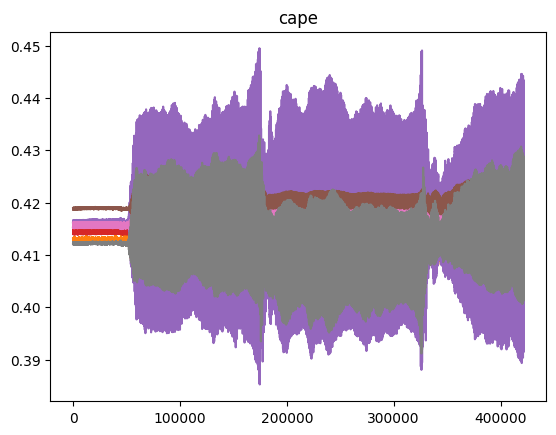

In [18]:
from matplotlib import pyplot as plt

for idx in range(num_sensors):
    plt.plot(cape_data[idx][1000:], label="cape sensor {}".format(idx+1))
    
plt.title("cape")
    
cape_data_clean = [cape_data[i][1000:] for i in range(num_sensors)]

In [14]:
cape_samples = len(cape_data[0]) / 22050
pepper_samples = len(pepper_data[0]) / 22050

print("cape samples: ", cape_samples, "pepper samples: ", pepper_samples)


cape samples:  19.17968253968254 pepper samples:  31.114739229024945


Text(0.5, 1.0, 'pepper')

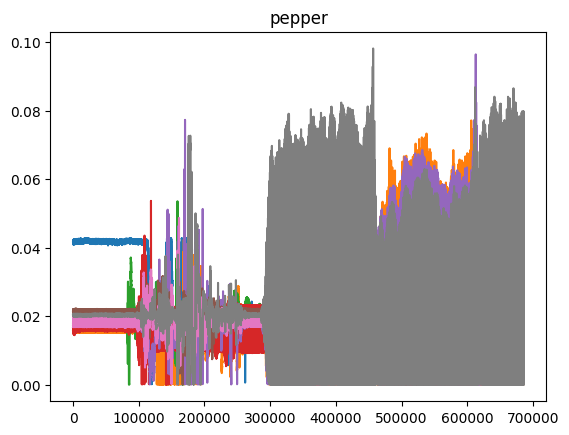

In [20]:
for idx in range(num_sensors):
    plt.plot(pepper_data[idx], label="cape sensor {}".format(idx+1))
    
plt.title("pepper")
    
# pepper_data = [pepper_data[i][1000:] for i in range(num_sensors)]

In [23]:
import numpy as np

cape_data_min = np.min(cape_data).round(3)
cape_data_max = np.max(cape_data).round(3)
cape_data_mean = np.mean(cape_data).round(3)

pepper_data_min = np.min(pepper_data).round(3)
pepper_data_max = np.max(pepper_data).round(3)
pepper_data_mean = np.mean(pepper_data).round(3)

print("cape data min: {}, max: {}, avg: {}".format(cape_data_min, cape_data_max, cape_data_mean))
print("pepper data min: {}, max: {}, avg: {}".format(pepper_data_min, pepper_data_max, pepper_data_mean))

cape data min: 0.141, max: 0.449, avg: 0.415
pepper data min: 0.01, max: 0.022, avg: 0.018
